tensorflow求解多元线性回归 
案例来自： 神经网络与深度学习——TensorFlow2.0实战 牟琦、李占利、张昭昭 
http://www.icourse163.org/learn/XUST-1206363802?tid=1206674203#/learn/announce

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
boston=keras.datasets.boston_housing

In [9]:
(x_train, y_train), (x_test, y_test)=boston.load_data()
x_train.shape,y_train.shape,x_test.shape,y_test.shape,len(x_train),len(y_train)

((404, 13), (404,), (102, 13), (102,), 404, 404)

In [7]:
x_train.dtype,y_train.dtype,x_test.dtype,y_test.dtype

(dtype('float64'), dtype('float64'), dtype('float64'), dtype('float64'))

In [74]:
np.ones((10,1)).dtype

dtype('float64')

In [80]:
num_train=len(x_train)
num_test=len(x_test)
train_x0=np.ones((num_train,1),dtype=np.float32) 
train_x=x_train.astype(np.float32)
train_x=(train_x-train_x.min(axis=0))/(train_x.max(axis=0)-train_x.min(axis=0))
train_x=tf.concat([train_x0,train_x],axis=1) 
train_y=tf.constant(y_train.astype(np.float32).reshape(-1,1))

test_x0=np.ones((num_test,1),dtype=np.float32)
test_x=x_test.astype(np.float32)
test_x=(test_x-test_x.min(axis=0))/(test_x.max(axis=0)-test_x.min(axis=0))
test_x=tf.concat([test_x0,test_x],axis=1) 
test_y=tf.constant(y_test.astype(np.float32).reshape(-1,1))
train_x.dtype,train_y.dtype,train_x.shape,train_y.shape,test_x.shape,test_y.shape

(tf.float32,
 tf.float32,
 TensorShape([404, 14]),
 TensorShape([404, 1]),
 TensorShape([102, 14]),
 TensorShape([102, 1]))

In [84]:
lr=0.01
times=2000
display_step=200

In [86]:
np.random.seed(612)
w=tf.Variable(np.random.randn(x_train.shape[1]+1,1),dtype=tf.float32)
train_mse=[]
test_mse=[]
for i in range(times+1):
    with tf.GradientTape() as tape:
        train_pred=train_x@w
        train_loss=tf.reduce_mean(tf.square(train_y-train_pred))*0.5
    
    test_pred=test_x@w
    test_loss=tf.reduce_mean(tf.square(test_y-test_pred))*0.5
    train_mse.append(train_loss)
    test_mse.append(test_loss)
    
    grad=tape.gradient(train_loss,w)
    w.assign_sub(lr*grad)
    
    if i % display_step == 0:
        print("i",i,"train_loss",train_loss.numpy(),"test_loss",test_loss.numpy())

i 0 train_loss 263.19348 test_loss 276.9941
i 200 train_loss 36.17655 test_loss 37.56295
i 400 train_loss 28.789461 test_loss 28.952513
i 600 train_loss 25.520695 test_loss 25.333912
i 800 train_loss 23.460524 test_loss 23.340532
i 1000 train_loss 21.887272 test_loss 22.039742
i 1200 train_loss 20.596283 test_loss 21.124842
i 1400 train_loss 19.510204 test_loss 20.467236
i 1600 train_loss 18.587011 test_loss 19.997717
i 1800 train_loss 17.797462 test_loss 19.671585
i 2000 train_loss 17.118929 test_loss 19.456856


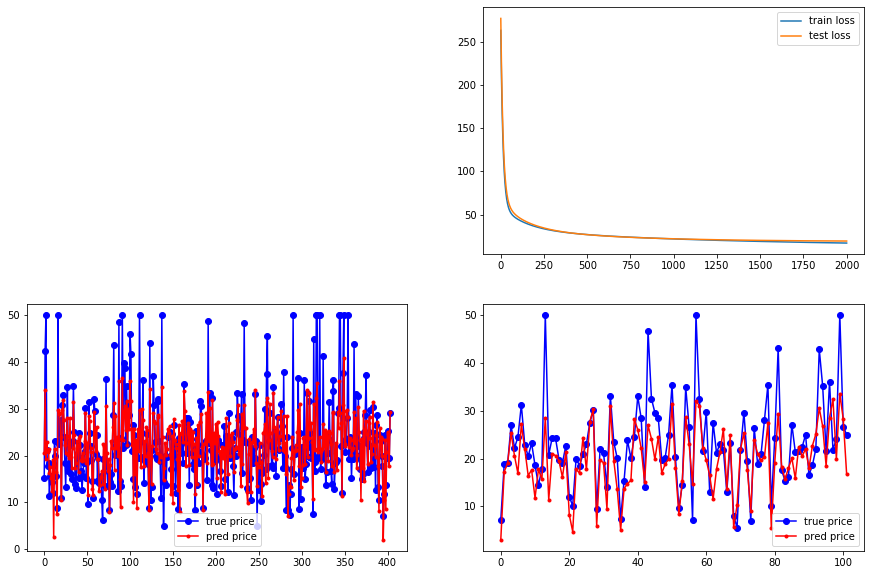

In [87]:
plt.figure(figsize=(15,10))
# plt.subplot(221)
# plt.scatter(train_x,train_y,color="blue",label="data")
# plt.plot(train_x,train_pred,color="red",label="model")
# plt.legend()
plt.subplot(222)
plt.plot(train_mse,label="train loss")
plt.plot(test_mse,label="test loss")
plt.legend()
plt.subplot(223)
plt.plot(train_y,color="blue",marker="o", label="true price")
plt.plot(train_pred,color="red",marker=".", label="pred price")
plt.legend()
plt.subplot(224)
plt.plot(test_y,color="blue",marker="o",label="true price")
plt.plot(test_pred,color="red",marker=".",label="pred price")
plt.legend()
plt.show()